In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import re
# import plotly.express as px

In [3]:
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select *   from DviraciaiPigu;"""
df = pd.read_sql_query(sql, con=SDB)

SDB.close()

for c in df.columns:
    print(c)

nuoroda
firstInfo
secondInfo
kaina
Prekės ID:
Kategorija:
Prekės pakuočių kiekis:
Pakuotės išmatavimai ir svoris (1):
Dviračių tipai:
Rūšis:
Skirta:
Prekės ženklas:
Rėmo dydis:
Svoris:
Šakė:
Ratlankiai:
Galinis permetėjas:
Priekinis permetėjas:
Pavarų perjungimo rankenėlė:
Diskiniai stabdžiai:
Stabdžių sistema:
Amortizatoriai galiniai:
Pardavėjas:
Rėmas:
Pavarų skaičius:
Ratų skersmuo:
Rekomenduojamas ūgis:
Visos šio ženklo prekės:
Pedalai:
Balnelis:
Padangos:
Pakuotė:
Rekomend. amžius nuo:
Licencijos (filmukų herojai):
Pakuotės išmatavimai ir svoris (2):


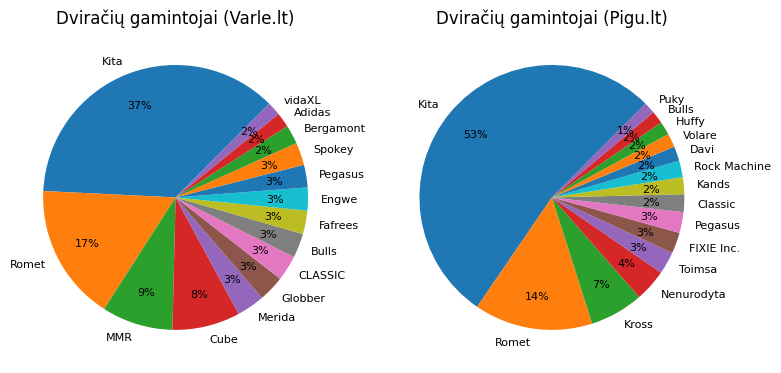

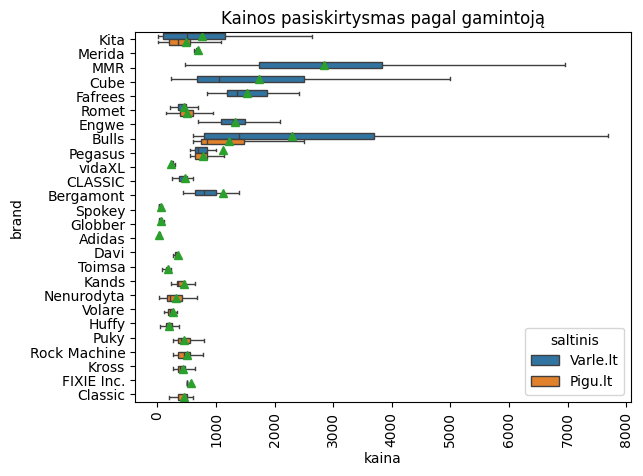

In [11]:
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select kaina,
gamintojas
from DviraciaiVarle;"""
df = pd.read_sql_query(sql, con=SDB)

sql2="""select kaina,
`Prekės ženklas:`
from DviraciaiPigu;"""
dfp = pd.read_sql_query(sql2, con=SDB)

SDB.close()
dfp.head()


dfp['gamintojas'] = dfp['Prekės ženklas:']

top = df['gamintojas'].value_counts().head(14).index.tolist()

df['brand'] = df['gamintojas'].apply(lambda x: x if x in top else 'Kita')
c = df['brand'].value_counts()
# df['kaina'] = df['kaina'].str.extract('(\d+)')
df['kaina'] = df['kaina'].apply(lambda x: float(x))

# pigu
top_p = dfp['gamintojas'].value_counts().head(14).index.tolist()

dfp['brand'] = dfp['gamintojas'].apply(lambda x: x if x in top_p else 'Kita')
c_p = dfp['brand'].value_counts()

df['saltinis'] = 'Varle.lt'
dfp['saltinis'] = 'Pigu.lt'

# sujungiam
df_join = df[['kaina', 'brand', 'saltinis']]
dfp_join = dfp[['kaina', 'brand', 'saltinis']]
df_combined = pd.concat([df_join, dfp_join])
# df_combined.dropna(subset='gamintojas', inplace=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))
# ax.pie(c.values, labels=c.index, autopct='%.f%%')
ax1.pie(c.values, 
        labels=c.index, 
        autopct='%.f%%',
        textprops={'fontsize':8, 'color': 'black'},
        startangle=45,
        # move the percentage inside the arcs
        pctdistance=0.75,
        # add spaces between the arcs
        # explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
        )
ax1.set_title('Dviračių gamintojai (Varle.lt)')

ax2.pie(c_p.values, 
        labels=c_p.index, 
        autopct='%.f%%',
        textprops={'fontsize':8, 'color': 'black'},
        startangle=45,
        # move the percentage inside the arcs
        pctdistance=0.75,
        # add spaces between the arcs
        # explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
        )
ax2.set_title('Dviračių gamintojai (Pigu.lt)')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots()
sns.boxplot(data=df_combined, y='brand', x='kaina',hue='saltinis', orient='h', ax=ax, showmeans=True, showfliers=False)
ax.tick_params(axis='x', rotation=90)
ax.set_title('Kainos pasiskirtysmas pagal gamintoją')
plt.show()


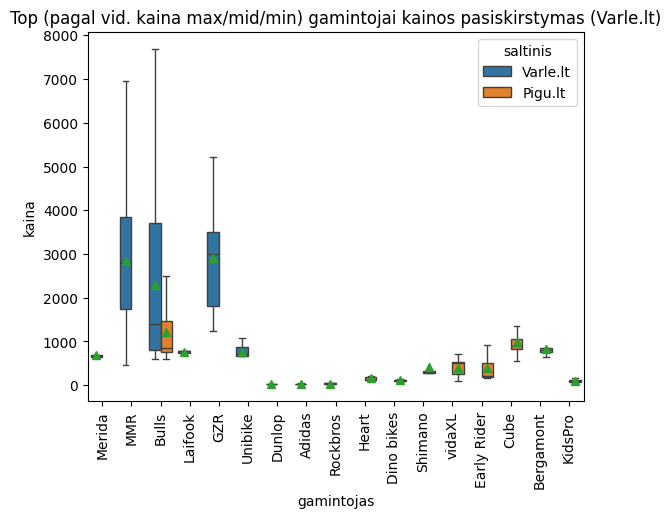

In [21]:
#  top 3 max/mid/min pagal kaina
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select kaina,
gamintojas
from DviraciaiVarle;"""
df = pd.read_sql_query(sql, con=SDB)

sql2="""select kaina,
`Prekės ženklas:`
from DviraciaiPigu;"""
dfp = pd.read_sql_query(sql2, con=SDB)

SDB.close()
# df['kaina'] = df['kaina'].str.extract('(\d+)')
df['kaina'] = df['kaina'].apply(lambda x: float(x))

# parenkam tik tuos gamintojus, kurie turi daugiau nei [x] gaminių
brand_counts = df['gamintojas'].value_counts()
brands_to_plot = brand_counts[brand_counts > 9].index

df_gamintojas = df[df['gamintojas'].isin(brands_to_plot)][['kaina', 'gamintojas']]
# Calculate the average price per brand
average_price_per_brand = df_gamintojas.groupby('gamintojas')['kaina'].mean().reset_index()
avg_price_sorted = average_price_per_brand.sort_values(by='kaina', ascending=True)
top5_low = avg_price_sorted['gamintojas'].head(3).tolist()
avg_price_sorted = average_price_per_brand.sort_values(by='kaina', ascending=False)
top5_high = avg_price_sorted['gamintojas'].head(3).tolist()
# print(top5_high)
# print(top5_low)
# # Find the median of the average prices
median_avg_price = average_price_per_brand['kaina'].median()
# print(median_avg_price)

# Find the 5 brands whose average prices are closest to the median
average_price_per_brand['price_diff_from_median'] = (average_price_per_brand['kaina'] - median_avg_price).abs()
top_5_middle_avg = average_price_per_brand.sort_values(by='price_diff_from_median').head(3)
top5_middle = top_5_middle_avg['gamintojas'].head(3).tolist()
# print(top5_middle)
top_brands = top5_high + top5_middle + top5_low
# print(top_brands)

# Pigu
# parenkam tik tuos gamintojus, kurie turi daugiau nei [x] gaminių
dfp['gamintojas'] = dfp['Prekės ženklas:']
brand_counts_p = dfp['gamintojas'].value_counts()
brands_to_plot_p = brand_counts_p[brand_counts_p > 10].index

df_gamintojas_p = dfp[dfp['gamintojas'].isin(brands_to_plot_p)][['kaina', 'gamintojas']]
# Calculate the average price per brand
average_price_per_brand_p = df_gamintojas_p.groupby('gamintojas')['kaina'].mean().reset_index()
avg_price_sorted_p = average_price_per_brand_p.sort_values(by='kaina', ascending=True)
top5_low_p = avg_price_sorted_p['gamintojas'].head(3).tolist()
avg_price_sorted_p = average_price_per_brand_p.sort_values(by='kaina', ascending=False)
top5_high_p = avg_price_sorted_p['gamintojas'].head(3).tolist()
# print(top5_high_p)
# print(top5_low_p)
# # Find the median of the average prices
median_avg_price_p = average_price_per_brand_p['kaina'].median()
# print(median_avg_price)

# Find the 5 brands whose average prices are closest to the median
average_price_per_brand_p['price_diff_from_median'] = (average_price_per_brand_p['kaina'] - median_avg_price_p).abs()
top_5_middle_avg_p = average_price_per_brand_p.sort_values(by='price_diff_from_median').head(3)
top5_middle_p = top_5_middle_avg_p['gamintojas'].head(3).tolist()
# print(top5_middle_p)
top_brands_p = top5_high_p + top5_middle_p + top5_low_p

df_brand_p = df_gamintojas_p[df_gamintojas_p['gamintojas'].isin(top_brands_p)]
df_brand = df_gamintojas[df_gamintojas['gamintojas'].isin(top_brands)]

df_brand['saltinis'] = 'Varle.lt'
df_brand_p['saltinis'] = 'Pigu.lt'


df_combined = pd.concat([df_brand, df_brand_p])
df_combined.dropna(subset='gamintojas', inplace=True)


sns.boxplot(data=df_combined, x='gamintojas', y='kaina', showmeans=True, showfliers=False, hue='saltinis')
plt.tick_params(axis='x', rotation=90)
plt.title('Top (pagal vid. kaina max/mid/min) gamintojai kainos pasiskirstymas (Varle.lt)')
plt.show()

In [77]:
# dviraciu remas

top3_max = ['GZR', 'MMR', 'Bulls']
top3_min = ['Dunlop', 'Adidas', 'Rockbros']
top3_mid = ['Merida', 'Unibike', 'Laifook']
top3_max_p = ['Bulls', 'Cube', 'Bergamont']
top3_min_p = ['KidsPro', 'Dino bikes', 'Heart']
top3_mid_p = ['vidaXL', 'Early Rider', 'Shimano']

SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select kaina,
gamintojas,
`rėmas (medžiaga)`,
`rėmo medžiaga`,
`dviračio rėmas (f, v)`,
`rėmo tipas (v)`,
`rėmas`,
`rėmo metalas`
from DviraciaiVarle;"""
df = pd.read_sql_query(sql, con=SDB)

sql2="""select kaina,
`Prekės ženklas:`,
`Rėmas:`

from DviraciaiPigu;"""
dfp = pd.read_sql_query(sql2, con=SDB)

SDB.close()

df['kaina'] = df['kaina'].apply(lambda x: float(x))
dfp['gamintojas'] = dfp['Prekės ženklas:']

for col in df.columns:
    if col not in ['kaina', 'gamintojas']:
        df['rėmo medžiaga'] = df['rėmo medžiaga'].fillna(df[col])

df['Rėmas'] = df['rėmo medžiaga']
dfp['Rėmas'] = dfp['Rėmas:']

df['saltinis'] = 'Varle.lt'
dfp['saltinis'] = 'Pigu.lt'

df.head()

,kaina,gamintojas,rėmas (medžiaga),rėmo medžiaga,"dviračio rėmas (f, v)",rėmo tipas (v),rėmas,rėmo metalas,Rėmas,saltinis
0,289.00,Tunturi,None,None,None,None,None,None,None,Varle.lt
1,799.99,Kaisda,None,None,None,None,None,None,None,Varle.lt
2,159.00,Esperia,None,None,None,None,None,None,None,Varle.lt
3,659.00,Esperia,None,None,None,None,None,None,None,Varle.lt
4,101.99,Quurio Bike,None,None,None,None,None,None,None,Varle.lt


In [78]:
def set_remas(x):
    if x is not None:
        if 'ALL' in x or 'Aliu' in x or 'aliu' in x:
            return 'Aliuminis'
        elif 'angl' in x or 'CARB' in x or 'Karb' in x or 'Angl' in x:
            return 'Karboninis'
        elif 'STEEL' in x or 'Plie' in x or 'CrMo' in x or 'Lyd' in x :
            return 'Plieninis'
        else:
            return x
        
def set_remas_pigu(x):
    if x is not None:
        if 'Angl' in x:
            return 'Karboninis'

df['Rėmas'] = df['Rėmas'].apply(set_remas)
dfp['Rėmas'] = dfp['Rėmas'].apply(set_remas)

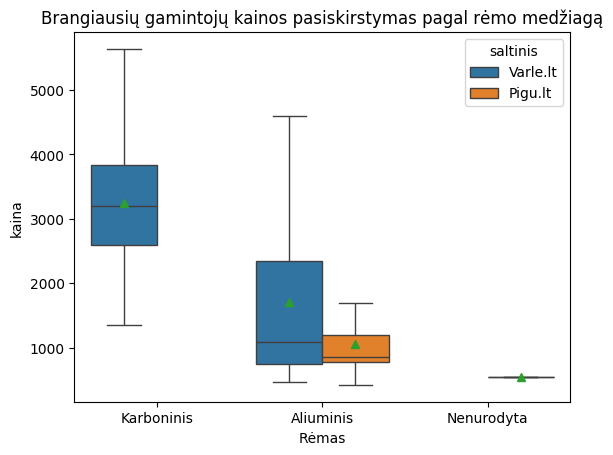

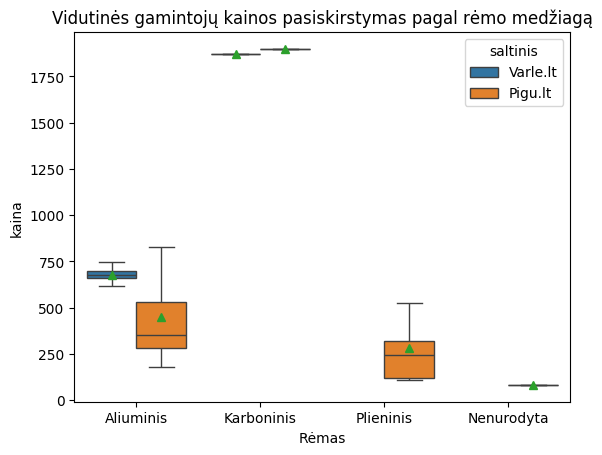

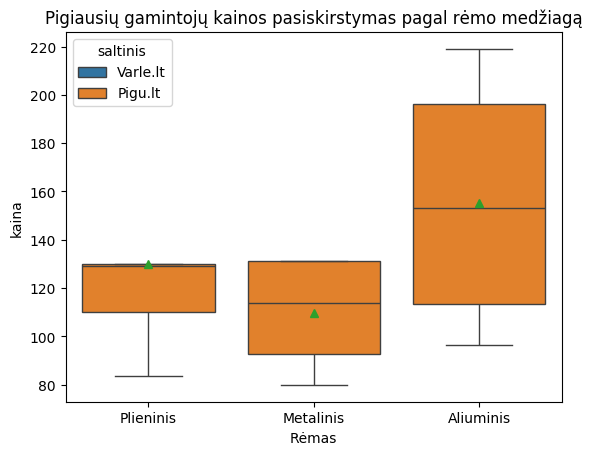

In [79]:
# max
df_remas_max = df[df['gamintojas'].isin(top3_max)][['kaina', 'gamintojas', 'Rėmas', 'saltinis']]
dfp_remas_max = dfp[dfp['gamintojas'].isin(top3_max_p)][['kaina', 'gamintojas', 'Rėmas', 'saltinis']]
# mid
df_remas_mid = df[df['gamintojas'].isin(top3_mid)][['kaina', 'gamintojas', 'Rėmas', 'saltinis']]
dfp_remas_mid = dfp[dfp['gamintojas'].isin(top3_mid_p)][['kaina', 'gamintojas', 'Rėmas', 'saltinis']]
# min
df_remas_min = df[df['gamintojas'].isin(top3_min)][['kaina', 'gamintojas', 'Rėmas', 'saltinis']]
dfp_remas_min = dfp[dfp['gamintojas'].isin(top3_min_p)][['kaina', 'gamintojas', 'Rėmas', 'saltinis']]
# sujungiam
df_combined_max = pd.concat([df_remas_max, dfp_remas_max]).reset_index()
df_combined_mid = pd.concat([df_remas_mid, dfp_remas_mid]).reset_index()
df_combined_min = pd.concat([df_remas_min, dfp_remas_min]).reset_index()


fig, ax = plt.subplots()
sns.boxplot(data=df_combined_max, x='Rėmas', y='kaina',hue='saltinis', showmeans=True, showfliers=False)
plt.title('Brangiausių gamintojų kainos pasiskirstymas pagal rėmo medžiagą')
plt.show()

fig, ax = plt.subplots()
sns.boxplot(data=df_combined_mid, x='Rėmas', y='kaina',hue='saltinis', showmeans=True, showfliers=False)
plt.title('Vidutinės gamintojų kainos pasiskirstymas pagal rėmo medžiagą')
plt.show()

fig, ax = plt.subplots()
sns.boxplot(data=df_combined_min, x='Rėmas', y='kaina',hue='saltinis', showmeans=True, showfliers=False)
plt.title('Pigiausių gamintojų kainos pasiskirstymas pagal rėmo medžiagą')
plt.show()





In [110]:
#  skirta v/m
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select kaina,
gamintojas,
skirta
from DviraciaiVarle;"""
df = pd.read_sql_query(sql, con=SDB)

sql2="""select kaina,
`Prekės ženklas:`,
`Skirta:`
from DviraciaiPigu;"""
dfp = pd.read_sql_query(sql2, con=SDB)

SDB.close()

df['kaina'] = df['kaina'].apply(lambda x: float(x))
df['Skirta'] = df['skirta']
dfp['gamintojas'] = dfp['Prekės ženklas:']

dfp['Skirta'] = dfp['Skirta:']

df['saltinis'] = 'Varle.lt'
dfp['saltinis'] = 'Pigu.lt'

dfp.head()

,kaina,Prekės ženklas:,Skirta:,gamintojas,Skirta,saltinis
0,418.0,Louke,Vyrams,Louke,Vyrams,Pigu.lt
1,299.0,Goetze,Moterims,Goetze,Moterims,Pigu.lt
2,293.0,Louke,"Universalus, \t\t\t\t\t Vyrams",Louke,"Universalus, \t\t\t\t\t Vyrams",Pigu.lt
3,235.0,N1,Moterims,N1,Moterims,Pigu.lt
4,139.0,Bimbo bike,Mergaitėms,Bimbo bike,Mergaitėms,Pigu.lt


In [111]:
def set_skirta_varle(x):
    if x is not None:
        if 'Moterims\n' in x or 'Vyrams\n' in x or 'Suau' in x:
            return 'Universalus'
        elif 'gadiem' in x or 'Berniu' in x:
            return 'Vaikams'
        else:
            return x
        
def set_skirta_pigu(x):
    if x is not None:
        if 'Univer' in x or 'Moterims,' in x:
            return 'Universalus'
        elif 'Berniukams' in x or 'Mergai' in x:
            return 'Paaugliams'
        else:
            return x
        
    
df['Skirta'] = df['Skirta'].apply(set_skirta_varle)
dfp['Skirta'] = dfp['Skirta'].apply(set_skirta_pigu)

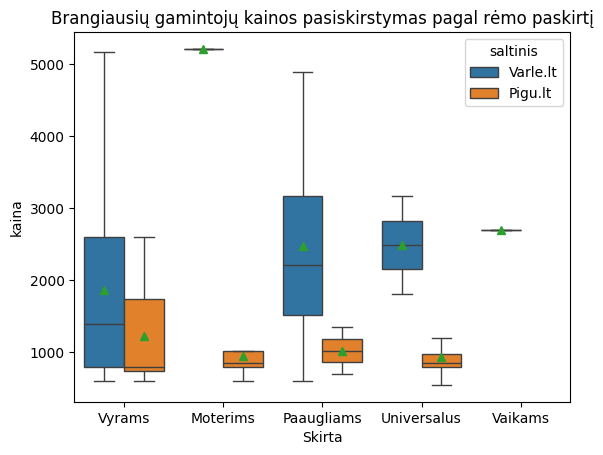

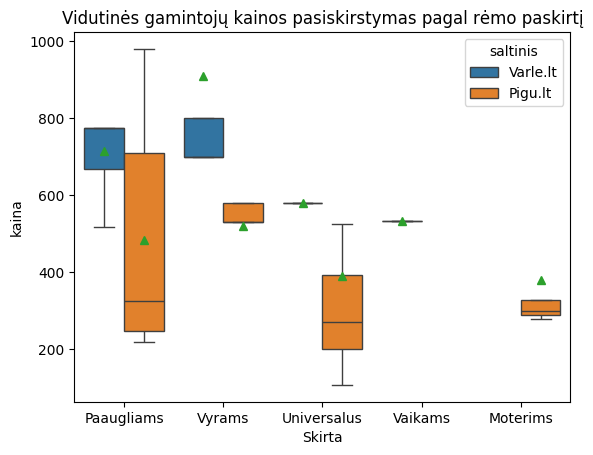

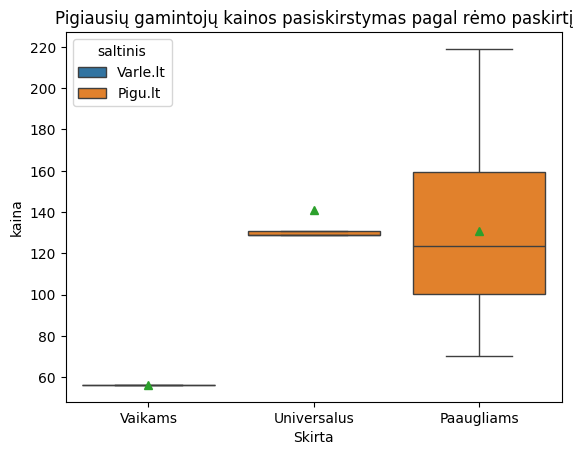

In [121]:
# max
df_remas_max = df[df['gamintojas'].isin(top3_max)][['kaina', 'gamintojas', 'Skirta', 'saltinis']]
dfp_remas_max = dfp[dfp['gamintojas'].isin(top3_max_p)][['kaina', 'gamintojas', 'Skirta', 'saltinis']]
# mid
df_remas_mid = df[df['gamintojas'].isin(top3_mid)][['kaina', 'gamintojas', 'Skirta', 'saltinis']]
dfp_remas_mid = dfp[dfp['gamintojas'].isin(top3_mid_p)][['kaina', 'gamintojas', 'Skirta', 'saltinis']]
# min
df_remas_min = df[df['gamintojas'].isin(top3_min)][['kaina', 'gamintojas', 'Skirta', 'saltinis']]
dfp_remas_min = dfp[dfp['gamintojas'].isin(top3_min_p)][['kaina', 'gamintojas', 'Skirta', 'saltinis']]
# sujungiam
df_combined_max = pd.concat([df_remas_max, dfp_remas_max]).reset_index()
df_combined_mid = pd.concat([df_remas_mid, dfp_remas_mid]).reset_index()
df_combined_min = pd.concat([df_remas_min, dfp_remas_min]).reset_index()


fig, ax = plt.subplots()
sns.boxplot(data=df_combined_max, x='Skirta', y='kaina',hue='saltinis', showmeans=True, showfliers=False)
plt.title('Brangiausių gamintojų kainos pasiskirstymas pagal rėmo paskirtį')
plt.show()

fig, ax = plt.subplots()
sns.boxplot(data=df_combined_mid, x='Skirta', y='kaina',hue='saltinis', showmeans=True, showfliers=False)
plt.title('Vidutinės gamintojų kainos pasiskirstymas pagal rėmo paskirtį')
plt.show()

fig, ax = plt.subplots()
sns.boxplot(data=df_combined_min, x='Skirta', y='kaina',hue='saltinis', showmeans=True, showfliers=False)
plt.title('Pigiausių gamintojų kainos pasiskirstymas pagal rėmo paskirtį')
plt.show()


In [150]:
#  dviracio tipas
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select kaina,
gamintojas,
tipas
from DviraciaiVarle;"""
df = pd.read_sql_query(sql, con=SDB)

sql2="""select kaina,
`Prekės ženklas:`,
`Dviračių tipai:`
from DviraciaiPigu;"""
dfp = pd.read_sql_query(sql2, con=SDB)

SDB.close()

df['kaina'] = df['kaina'].apply(lambda x: float(x))
dfp['gamintojas'] = dfp['Prekės ženklas:']
dfp['tipas'] = dfp['Dviračių tipai:']

df['saltinis'] = 'Varle.lt'
dfp['saltinis'] = 'Pigu.lt'


In [151]:
def set_tipas(x):
    if x is not None:
        if 'MTB' in x or 'Kaln' in x:
            return 'MTB'
        elif 'Miest' in x:
            return 'Miesto'
        elif 'Sulank' in x:
            return 'Sulankstomi'
        elif 'Hibri' in x:
            return 'Hibridiniai'
        elif 'Turist' in x:
            return 'Turistiniai'
        elif 'Trira' in x:
            return 'Triračiai'
        elif 'Fatb' in x:
            return 'Fatbike'
        elif 'BMX' in x:
            return 'BMX'
        else:
            return x
        
# def set_tipas_pigu(x):
#     if x is not None:

        
df['tipas'] = df['tipas'].apply(set_tipas)
dfp['tipas'] = dfp['tipas'].apply(set_tipas)

In [153]:
df.columns

Index(['kaina', 'gamintojas', 'tipas', 'saltinis'], dtype='object')

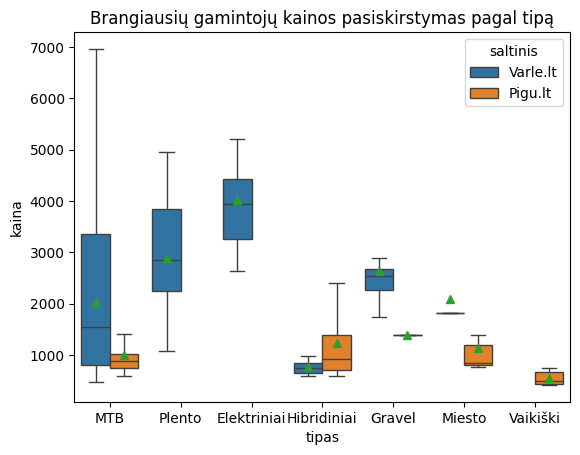

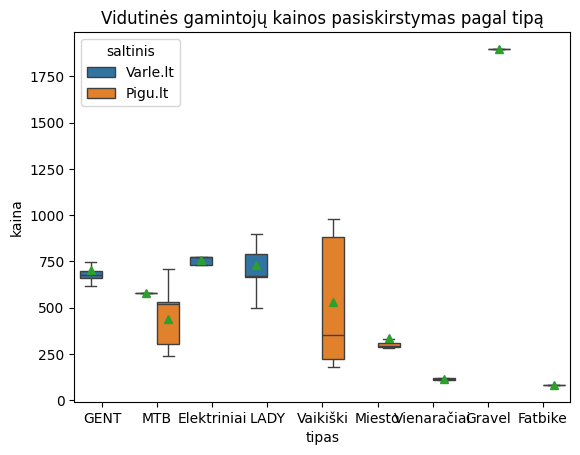

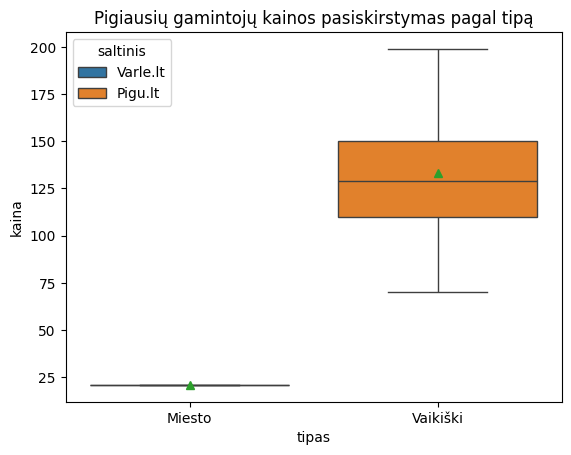

In [155]:
# max
df_remas_max = df[df['gamintojas'].isin(top3_max)][['kaina', 'gamintojas', 'tipas', 'saltinis']]
dfp_remas_max = dfp[dfp['gamintojas'].isin(top3_max_p)][['kaina', 'gamintojas', 'tipas', 'saltinis']]
# mid
df_remas_mid = df[df['gamintojas'].isin(top3_mid)][['kaina', 'gamintojas', 'tipas', 'saltinis']]
dfp_remas_mid = dfp[dfp['gamintojas'].isin(top3_mid_p)][['kaina', 'gamintojas', 'tipas', 'saltinis']]
# min
df_remas_min = df[df['gamintojas'].isin(top3_min)][['kaina', 'gamintojas', 'tipas', 'saltinis']]
dfp_remas_min = dfp[dfp['gamintojas'].isin(top3_min_p)][['kaina', 'gamintojas', 'tipas', 'saltinis']]
# sujungiam
df_combined_max = pd.concat([df_remas_max, dfp_remas_max]).reset_index()
df_combined_mid = pd.concat([df_remas_mid, dfp_remas_mid]).reset_index()
df_combined_min = pd.concat([df_remas_min, dfp_remas_min]).reset_index()


fig, ax = plt.subplots()
sns.boxplot(data=df_combined_max, x='tipas', y='kaina',hue='saltinis', showmeans=True, showfliers=False)
plt.title('Brangiausių gamintojų kainos pasiskirstymas pagal tipą')
plt.show()

fig, ax = plt.subplots()
sns.boxplot(data=df_combined_mid, x='tipas', y='kaina',hue='saltinis', showmeans=True, showfliers=False)
plt.title('Vidutinės gamintojų kainos pasiskirstymas pagal tipą')
plt.show()

fig, ax = plt.subplots()
sns.boxplot(data=df_combined_min, x='tipas', y='kaina',hue='saltinis', showmeans=True, showfliers=False)
plt.title('Pigiausių gamintojų kainos pasiskirstymas pagal tipą')
plt.show()

In [171]:
#  dviracio ratai
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select kaina,
gamintojas,
`ratų dydis (coliais)`,
`ratų skersmuo, coliais`,
`rato skersmuo [colis]`,
`ratų dydis (f,v)`,
`rato dydis`,
`ratai`,
`ratų dydis coliais`
from DviraciaiVarle;"""
df = pd.read_sql_query(sql, con=SDB)

sql2="""select kaina,
`Prekės ženklas:`,
`Ratų skersmuo:`
from DviraciaiPigu;"""
dfp = pd.read_sql_query(sql2, con=SDB)

SDB.close()

df['kaina'] = df['kaina'].apply(lambda x: float(x))
dfp['gamintojas'] = dfp['Prekės ženklas:']
dfp['ratai'] = dfp['Ratų skersmuo:']

for col in df.columns:
    if col not in ['kaina', 'gamintojas']:
        df['ratai'] = df['ratai'].fillna(df[col])

df['saltinis'] = 'Varle.lt'
dfp['saltinis'] = 'Pigu.lt'

# df['ratai'] = df['ratai'].str.extract('(\d+)')
# df['ratai'] = df['ratai'].apply(lambda x: float(x))

df.head()

,kaina,gamintojas,ratų dydis (coliais),"ratų skersmuo, coliais",rato skersmuo [colis],"ratų dydis (f,v)",rato dydis,ratai,ratų dydis coliais,saltinis
0,289.00,Tunturi,None,None,None,None,None,None,None,Varle.lt
1,799.99,Kaisda,None,None,None,None,None,None,None,Varle.lt
2,159.00,Esperia,None,None,None,None,None,None,None,Varle.lt
3,659.00,Esperia,27.5,None,None,None,None,27.5,None,Varle.lt
4,101.99,Quurio Bike,None,12.0,None,None,None,12.0,None,Varle.lt


In [178]:
def set_ratai_varle(x):
    if x is not None:
        if '28' in x:
            return '28'
        else:
            return x
        

def set_ratai_pigu(x):
    if x is not None:
        if len(x) == 4:
            return x[:2]
        elif len(x) == 3:
            return x[0]
        elif len(x) == 6:
            return x[:4]
        else:
            return x
        
df['ratai'] = df['ratai'].apply(set_ratai_varle)
dfp['ratai'] = dfp['ratai'].apply(set_ratai_pigu)

In [179]:
c = df['ratai'].value_counts()
d = dfp['ratai'].value_counts()
d

ratai
28                                    502
20                                    220
26                                    211
29                                    200
16                                    142
27.5                                  139
12                                     91
24                                     90
14                                     83
18                                     63
10                                     21
27                                     14
11                                      7
19                                      5
9                                       3
27 ", \t\t\t\t\t            29 "        2
22                                      2
10 ", \t\t\t\t\t            14 "        1
19 ", \t\t\t\t\t            28 "        1
27.5 ", \t\t\t\t\t            29 "      1
12 ", \t\t\t\t\t            20 "        1
10 ", \t\t\t\t\t            12 "        1
26 ", \t\t\t\t\t            28 "        1
17                          